In [2]:
!pip install langgraph langsmith

In [3]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00


In [7]:
from google.colab import userdata
groq_api_key=userdata.get('GROQ_API_KEY')
langsmith=userdata.get('LANGSMITH_API_KEY')

In [8]:
import os
os.environ["LANGCHAIN_API_KEY"]=langsmith
os.environ["LANGSMITH_TRACKING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [9]:
from langchain_groq import ChatGroq

In [10]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x781df2d0dbd0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x781df292fb90>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start Building ChatBot using Langgraph

In [11]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [12]:
class State(TypedDict):
  ## Messages
  messages:Annotated[list, add_messages]

graph_builder=StateGraph(State)

In [13]:
graph_builder

In [14]:
## ChatBot should be interacting with LLM
## Invoking the previous message given by the user
def chatbot(state:State):
  return{"messages":llm.invoke(state['messages'])}

In [15]:
## Adding Chatbot in Graph Builder
graph_builder.add_node("chatbot",chatbot)

In [16]:
graph_builder

In [17]:
## Connecting Chatbot to start and end node
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [18]:
## After connecting Start and End we will complie it
graph=graph_builder.compile()

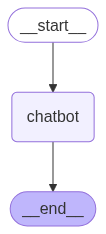

In [19]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [20]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:", value["messages"].content)

User: Hello
dict_values([{'messages': AIMessage(content='Hello! 👋\n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 0.00116783, 'queue_time': 0.18751526599999999, 'total_time': 0.028440557}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--33879c37-dcdd-4dcf-b6af-44cfda72d77c-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})}])
content='Hello! 👋\n\nHow can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 0.00116783, 'queue_time': 0.18751526599999999, 'total_time': 0.028440557}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 

KeyboardInterrupt: Interrupted by user